# Чисельне інтегрування
--------------------
При чисельному інтегруванні неперервної функції значення інтеграла 

$\quad\qquad\qquad\qquad I=\int^{b}_{a}f(x)\,dx$   

можна знайти наближено за *квадратурною формулою*

$(1)\qquad\qquad\qquad     I_n=\sum_{i=0}^{n}A^{(n)}_{i}f(x_{i}),$

де $n$ -- ціле число,  

$x_{i},\, i=\overline{0,n},$ -- вузли (абсциси) такі, що  $a\leq x_{0}<x_{1}<...<x_{n}\leq b$, 

$A^{(n)}_{i},\, i=\overline{0,n},$  -- коефіцієнти (сталі).

Тоді 

$\quad\qquad\qquad\qquad I=I_n+\widehat{R}_{n}(f),$

де $\widehat{R}_{n}(f)$ -- залишковий член квадратурної формули. 

Оскільки методи визначення коефіцієнтів квадратурних формул забезпечують $\widehat{R}_{n}(f) \to 0$ при $n\to \infty$, то 

$\quad\qquad\qquad\qquad I \approx I_n.$ 


# 5.2.2. Квадратури Ньютона-Котеса: квадратурні формули прямокутників, трапецій і парабол (Сімпсона)
---------------------
Нагадаємо, що квадратурні формули Ньютона-Котеса отримані шляхом заміни підінтегральної функції інтерполяційним поліномом Лагранжа. Залежно від степеня $n$ полінома розрізняють квадратурні формули:
*    $n=0$ -- прямокутників,
*    $n=1$ -- трапецій,
*    $n=2$ -- парабол (Сімпсона).

Якщо проміжок інтегрування попередньо поділити на $m > 1$ однакових відрізків і на кожному застосувати квадратурну формулу, то отриману формулу називають *великою квадратурною формулою*, позначатимемо її $I_{n,m}$.

##### Позначення 
${\bf x}:=(x_0, x_1, \ldots, x_{m-1})$,

${\bf y}:=(y_0, y_1, \ldots, y_{m-1}),\quad y_k=f(x_k),\; k=\overline{0,(m-1)}$.

##### Пояснення виразів, 
які зустрічаються в коді програми, де використано масиви бібліотеки NumPy.

Вектор, в якому нумерація індексів починається з нуля, розглядаємо як математичну модель одновимірного масиву ``x``, елементи якого доступні за їхніми індексами:

``x[0],x[1],x[2],...,x[m-1]``.  

Вираз `` y= f(x)`` означає обчислення масиву ``y`` за правилом, яке задає функція $f$, коли її аргумент послідовно набуває значень елементів масиву ``x``. Математичною моделлю такого виразу є обчислення векторної функції  ${\bf y}= f({\bf x})$.

Вираз ``y.sum()`` означає обчислення суми усіх елементів масиву ``y``.

``x=np.linspace(a, b, m)`` означає обчислення елементів масиву  ``x`` за формулою $x_i=a+hi, \; i= \overline{0,m}, \; h=\frac{b-a}{m}$.

Вирази підмножин елементів масиву  ``x``:
*    ``x[i:j]`` -- підмножина ``x[i],x[i+1],x[i+2],...,x[j-1]``
*    ``x[:]``  -- множина усіх елементів  
*    ``x[0::2]`` -- підмножина елементів з парними індексами ``x[0],x[2],x[4],...`` 
*    ``x[1::2]`` -- підмножина елементів з непарними індексами ``x[1],x[3],x[5],...`` 
*    ``x[-1]``  -- останній елемент 

## 5.2.2.2.  Велика квадратурна формула прямокутників

Нехай проміжок інтегрування розбито на $m$ відрізків довжиною $h=\frac{b-a}{m}$, тоді велика квадратурна формула (середніх) прямокутників має вигляд:

$(2)\qquad\qquad\qquad     I_{0,m}=h\sum_{i=0}^{m-1}f(x_{i})$.

Враховуючи попередні позначення, вираз для обчислення за такою формулою буде такий

``I_0_m=h*y.sum()``

#### Пояснення до використання програмного коду
-----------------
*   Підготувати потрібні функції : 
    1.   виконати комірку з імпортом NumPy 
    2.   виконати комірку з функцією ``rectangle_formula``
    3.   виконати комірку з підінтегральною функцією ``f``

*   Для отримання наближення інтеграла треба виконати комірку з викликом функції ``rectangle_formula``, перед виконанням задати відповідні аргументи цієї функції.

*   Щоб переконатися, що наближення достатньо точне, можна виконати кілька послідовних викликів, збільшуючи значення параметра $m$.

In [1]:
import numpy as np

In [2]:
def rectangle_formula(f,a,b,m):
    """ обчислення наближеного значення інтеграла  
        за великою формулою прямокутників
    """
    h=(b-a)/m
    x=np.linspace(a+h/2, b-h/2, m) #обчислення усіх вузлів квадратурної формули
    y=f(x)                         # обчислення функції в усіх вузлах
    return h*y.sum()               # обчислення наближеного значення інтеграла

##### Приклад 1.
$f(x)=x, \quad [a,b]=[0,\,10]$

In [3]:
def f1(x):
    return x

In [4]:
#виклик функції для знаходження наближення інтеграла
rectangle_formula(f1,0,10,1)

50.0

##### Приклад 2.
$f(x)=x\,e^{-x}\,cos(2x), \quad [a,b]=[0,\,2\pi]$

Значення інтеграла (**точне**) можна обчислити так: 

In [5]:
I=0.12*(np.exp(-2*np.pi)-1)-0.4*np.pi*np.exp(-2*np.pi)
print(I)

-0.12212260461896841


In [6]:
def f2(x):
    return x*np.exp(-x)*np.cos(2*x)

In [7]:
#виклик функції для знаходження наближення інтеграла
rectangle_formula(f2,0,2*np.pi,10)

-0.10387020876663354

In [8]:
#виклик функції для знаходження наближення інтеграла
rectangle_formula(f2,0,2*np.pi,100)

-0.12195631578862703

In [9]:
#виклик функції для знаходження наближення інтеграла
rectangle_formula(f2,0,2*np.pi,1000)

-0.1221209434386473

In [10]:
#виклик функції для знаходження наближення інтеграла
rectangle_formula(f2,0,2*np.pi,10000)

-0.12212258800733602

## 5.2.2.3.  Велика квадратурна формула трапецій

Нехай, як і раніше, проміжок інтегрування розбито на $m$ відрізків довжиною $h=\frac{b-a}{m}$, тоді велика квадратурна формула трапецій має вигляд:

$(3)\qquad\qquad\qquad     I_{1,m}=h\left(\frac{1}{2}f(x_0)+\sum_{i=1}^{m-1} f(x_i)+\frac{1}{2}f(x_m)\right)$.

Враховуючи попередні позначення, вираз для обчислення за такою формулою буде такий

``I_1_m=h*(0.5*(y[0]+y[m])+y[1:m].sum())``

**Використання програмного коду** таке, як і для методу прямокутників, з тим винятком, що працюємо з функцією ``trapezoidal_formula``


In [11]:
def trapezoidal_formula(f,a,b,m):
    """  обчислення наближеного значення інтеграла  
        за великою формулою трапецій     
      """
    h=(b-a)/m
    x=np.linspace(a, b, m+1) 
    y=f(x)
    return h*( 0.5*(y[0]+y[m]) + y[1:m].sum() )

In [12]:
trapezoidal_formula(f1,0,10,10)

50.0

In [13]:
trapezoidal_formula(f2,0,2*np.pi,10)

-0.15723087054055593

In [14]:
trapezoidal_formula(f2,0,2*np.pi,100)

-0.12245503440935065

In [15]:
trapezoidal_formula(f2,0,2*np.pi,1000)

-0.12212592696481724

In [16]:
trapezoidal_formula(f2,0,2*np.pi,10000)

-0.12212263784223164

## 5.2.2.4.  Велика квадратурна формула парабол (Сімпсона)

Нехай, як і раніше, проміжок інтегрування розбито на $m$ відрізків довжиною $h=\frac{b-a}{m}$, тоді велика квадратурна формула парабол має вигляд:

$(4)\qquad\qquad\qquad     I_{2,m}=\frac{h}{6}\left( f(x_0)+4 \sum_{i=0}^{m-1} f(x_{2i+1})+ 2\sum_{i=1}^{m-1} f(x_{2i})+f(x_{2m})\right)$.

Враховуючи попередні позначення, вираз для обчислення за такою формулою буде такий

``I_2_m=h/6*( y[0] + 4*y[1::2].sum() + 2*y[1:2*m-1:2].sum() + y[2*m]``

**Використання програмного коду** таке, як і для методу прямокутників, з тим винятком, що працюємо з функцією ``simpson_formula``


In [17]:
def simpson_formula(f,a,b,m):
    """  обчислення наближеного значення інтеграла  
        за великою формулою Сімпсона     
      """
    h=(b-a)/m
    x=np.linspace(a, b, 2*m+1) 
    y=f(x)
    return h/6*(y[0]+4*y[1::2].sum()+2*y[2:2*m-1:2].sum()+y[2*m])

In [18]:
simpson_formula(f1,0,10,10)

50.0

In [19]:
simpson_formula(f2,0,2*np.pi,10)

-0.12165709602460766

In [20]:
simpson_formula(f2,0,2*np.pi,100)

-0.12212255532886822

In [21]:
trapezoidal_formula(f2,0,2*np.pi,1000)

-0.12212592696481724

In [22]:
trapezoidal_formula(f2,0,2*np.pi,10000)

-0.12212263784223164

## Аналіз результатів обчислювального експерименту
-------------
1)   Оскільки підінтегральна функція у прикладі 1 є сталою, то усі розглянуті квадратурні формули є точними для цього випадку.

2)   Для функції з прикладу 2 спостерігаємо наближення величин $I_{n,m}$ до точного значення інтегралу при збільшенні значення параметра $m$. 

Для точнішої оцінки знайдемо абхолютну похибку чисельного інтегрування за формулою 
$e_{n,m}:=|I-I_{n,m}|$
та візуалізуємо отримані результати


In [23]:
#mk=[10**k for k in [1,2,3,4,5]]
mk=[2**k for k in range(2,15)]
mk

[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]

In [24]:
e_0=[ np.abs( I - rectangle_formula(f2,0,2*np.pi,m)) for m in mk]
e_1=[ np.abs( I - trapezoidal_formula(f2,0,2*np.pi,m)) for m in mk]
e_2=[ np.abs( I - simpson_formula(f2,0,2*np.pi,m)) for m in mk]

In [25]:
r_0=[0,]
r_1=[0,]
r_2=[0,]
for i in range(1,len(e_0)):
    r_0.append(np.log2(e_0[i-1]/e_0[i]))
    r_1.append(np.log2(e_1[i-1]/e_1[i]))
    r_2.append(np.log2(e_2[i-1]/e_2[i]))

In [26]:
r_0=[0,]
r_1=[0,]
r_2=[0,]
for i in range(1,len(e_0)):
    r_0.append((e_0[i-1]/e_0[i]))
    r_1.append((e_1[i-1]/e_1[i]))
    r_2.append((e_2[i-1]/e_2[i]))

In [27]:
import pandas as pd

In [28]:
df=pd.DataFrame({'m':mk,'e_0_m':e_0,'r_0_m':r_0,'e_1_m':e_1,'r_1_m':r_1,'e_2_m':e_2,'r_2_m':r_2}, index=range(2,15))
df

,m,e_0_m,r_0_m,e_1_m,r_1_m,e_2_m,r_2_m
2,4,1.221226e-01,0.000000,2.348282e-01,0.000000,3.138990e-03,0.000000
3,8,2.980433e-02,4.097479,5.635282e-02,4.167107,1.085280e-03,2.892332
4,16,6.747837e-03,4.416871,1.327424e-02,4.245275,7.381014e-05,14.703676
5,32,1.638624e-03,4.117989,3.263203e-03,4.067857,4.681869e-06,15.765100
6,64,4.065851e-04,4.030213,8.122894e-04,4.017291,2.936021e-07,15.946308
7,128,1.014536e-04,4.007596,2.028522e-04,4.004342,1.836519e-08,15.986883
8,256,2.535135e-05,4.001902,5.069927e-05,4.001087,1.148058e-09,15.996740
9,512,6.337085e-06,4.000476,1.267396e-05,4.000272,7.175727e-11,15.999188
10,1024,1.584224e-06,4.000119,3.168435e-06,4.000068,4.484899e-12,15.999752
11,2048,3.960531e-07,4.000030,7.921054e-07,4.000017,2.802758e-13,16.001733


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

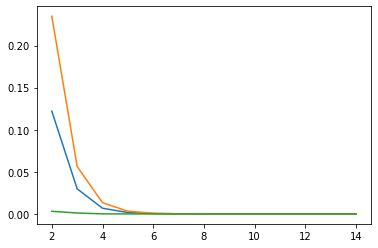

In [30]:
df.e_0_m.plot()
df.e_1_m.plot()
df.e_2_m.plot()

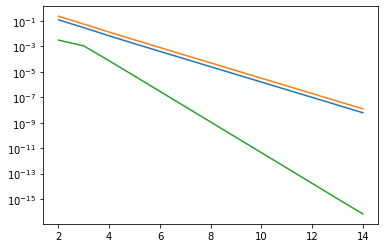

In [31]:
df.e_0_m.plot(logy=True)
df.e_1_m.plot(logy=True)
df.e_2_m.plot(logy=True)
df.plot